# Lending Club Case Study

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Set option to display all rows and columns in the Notebook

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
# Read the Data Set

df = pd.read_csv('C:/Users/rashm/Downloads/loan/loan.csv', low_memory=False)

In [5]:
# Original dimension of the dataset

df.shape

(39717, 111)

In [6]:
# Check sample rows. Notice presence of NaNs

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Understanding & Cleaning

#### 1. Dropping columns with NaNs

In [7]:
# Check the count of NaN values across all columns. Notice the count is same as the number of rows for some columns.

df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# Drop columns with all or unreasonably large number of NaNs.

# Assumption : Any and all columns with more than 50% values set to NaN are not worth considering for Data Analysis. 

# df.dropna(axis=1, how='all')   is not used as it's giving Out of Memory Error

df.drop(df.loc[:, 'annual_inc_joint':'verification_status_joint'].columns, axis = 1,inplace=True)
df.drop(df.loc[:, 'tot_coll_amt':'bc_util'].columns, axis = 1,inplace=True)
df.drop(df.loc[:, 'mo_sin_old_il_acct':'percent_bc_gt_75'].columns, axis = 1,inplace=True)
df.drop(df.loc[:, 'tot_hi_cred_lim':'total_il_high_credit_limit'].columns, axis = 1,inplace=True)


#### 2. Dropping irrelevant columns

In [9]:
# Drop customer behaviour variables. These cannot be known at the time of loan application.
# Hence, cannot be used to predict the the result of loan approval.

# Note: Some of the behaviour variables are already removed as part of the previous step

df.drop(['mths_since_last_delinq'], axis = 1,inplace=True)
df.drop(['mths_since_last_record'], axis = 1,inplace=True)
df.drop(['next_pymnt_d'], axis = 1,inplace=True)
df.drop(['mths_since_last_major_derog'], axis = 1,inplace=True)


In [10]:
# Dropping desc as it contains descriptive text about the loan. It is not a categorical variable and
# will not have any impact on the analysis

df.drop(['desc'], axis = 1,inplace=True)


#### 3. Dropping irrelevant rows

In [11]:
df['home_ownership'].value_counts()['NONE']

3

In [12]:
df = df[df['home_ownership'] != 'NONE']

In [13]:
df['home_ownership'].value_counts()['OTHER']

98

In [14]:
df = df[df['home_ownership'] != 'OTHER']

In [15]:
# Lastly, we are only interested in analyzing accounts which have Defaulted or are Fully Paid.
# Current accounts' data is not useful as it cannot be predicted if these account will default
# in the future.

df = df[df['loan_status'] != 'Current']


In [16]:
# Checking the dimensions again. Notice the significant reduction in the size of the dataset.

df.shape


(38476, 53)

#### 4. Modifying column values to create int/float datatypes

In [17]:
# checking datatypes of remaining columns

df.dtypes


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [18]:
# int_rate (interest rate) should be a float value. Check sample values of int_rate above.
# Notice the '%' sign appended to the floating point number. This can be removed to create
# a float data type.

df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]) if x[-1]=="%" else float(x))
df['int_rate'].dtype


dtype('float64')

In [19]:
# Missing Value Imputation:

# emp_length has 1075 NaN entries. There can people without jobs applying for loans e.g. Students.
# Hence, NaN cannot be considered as invalid entries. Instead of dropping these, we'll put 0 years
# as a replacement string for NaN

df['emp_length'] = df['emp_length'].fillna('0 years')


In [20]:
# emp_length has entries such as 10+ years, < 1 year

df['emp_length'] = df['emp_length'].str.replace(r'\D', '').astype(int)


C:\Users\rashm\AppData\Local\Temp/ipykernel_15132/660290453.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace(r'\D', '').astype(int)


In [21]:
# Check unique values of term

df['term'].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [22]:
# Removing extra spaces on the left of the strings

df['term'] = df['term'].str.lstrip()
df['term'].unique()


array(['36 months', '60 months'], dtype=object)

In [23]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [24]:
#df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'] = pd.to_datetime(df['issue_d'].str.upper(), format='%b-%y', yearfirst=False)
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [25]:
df['issue_month'] = df['issue_d'].dt.month_name().str[:3]

In [26]:
df['issue_month'].head()

0    Dec
1    Dec
2    Dec
3    Dec
5    Dec
Name: issue_month, dtype: object

### Data Analysis
#### We are going to consider the following variables for analysis:
#### grade, sub_grade, purpose, loan_amount, home_ownership, issue_d, term, emp_length and int_rate

In [27]:
# data frame with only defaulters

df_co = df[df['loan_status'] == 'Charged Off']

## Grade

In [28]:
percentage_of_defaulters = df['loan_status'].value_counts()['Charged Off'] / df.shape[0] * 100
percentage_of_defaulters

14.577918702567835

In [29]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

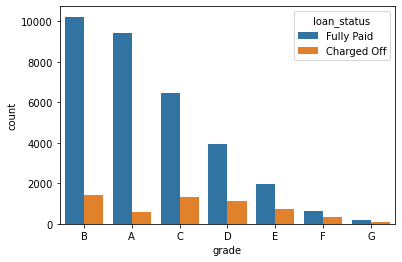

In [30]:
ax = sns.countplot(x="grade", hue="loan_status", data=df, order = df['grade'].value_counts().index)

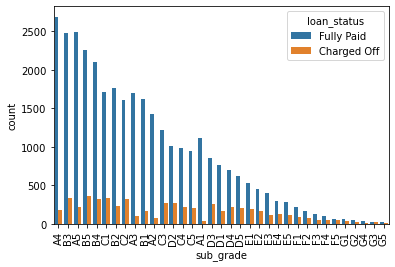

In [31]:
ax = sns.countplot(x="sub_grade", hue="loan_status", data=df, order = df['sub_grade'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

In [32]:
for grd in df["grade"].unique():
    percentage_of_defaulters = df_co['grade'].value_counts()[grd]  / df['grade'].value_counts()[grd]  * 100
    print(grd, percentage_of_defaulters)

B 12.189674426595653
C 17.203888462522386
A 5.9880239520958085
E 26.84487951807229
F 32.648870636550306
D 21.96132596685083
G 33.77926421404682


In [33]:
for grd in df["sub_grade"].unique():
    percentage_of_defaulters = df_co['sub_grade'].value_counts()[grd]  / df['sub_grade'].value_counts()[grd]  * 100
    print(grd, percentage_of_defaulters)

B2 11.328320802005013
C4 17.637271214642265
C5 18.071242397914858
C1 16.333495855680155
A4 6.208580397628182
E1 27.323162274618586
F2 30.042918454935624
B5 13.63984674329502
C3 18.14516129032258
B1 9.497206703910614
D1 17.976318622174382
A1 2.633889376646181
B3 12.038352272727272
B4 13.497942386831276
C2 16.614745586708203
D2 21.02803738317757
A3 5.7158712541620424
A5 7.942371629109715
D5 24.90974729241877
A2 4.916943521594684
E4 29.85781990521327
D3 22.95229522952295
D4 23.43921139101862
F3 28.901734104046245
E3 23.00194931773879
F1 29.836065573770494
E5 28.165374677002585
G4 24.074074074074073
E2 26.590538336052198
G2 36.36363636363637
G1 32.97872340425532
F5 48.214285714285715
F4 35.099337748344375
G5 34.48275862068966
G3 42.22222222222222


In [62]:
# Observation for grades:
# Grade G has the highest percentage of defaulters (34%), closely followed by grade F (33%)
# Grade A has the lowest percentage of defaulters (6%)

# Sub-grade F5 has the highest default rate at about 48% (47.78%)
# Grade A is the least risky grade with sub-grade A1 having default rate of 2.63%

## Purpose

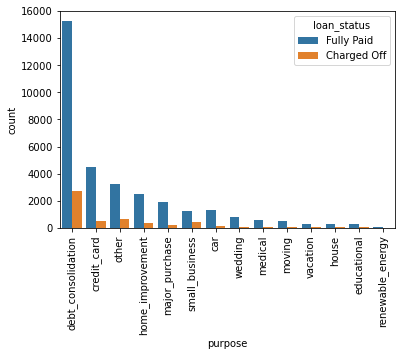

In [35]:
ax = sns.countplot(x="purpose", hue="loan_status", data=df, order = df['purpose'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

In [36]:
for p in df["purpose"].unique():
    percentage_of_defaulters = df_co['purpose'].value_counts()[p]  / df['purpose'].value_counts()[p]  * 100
    print(p)
    print(percentage_of_defaulters)
    print('---------------------------')

credit_card
10.76555023923445
---------------------------
car
10.62124248496994
---------------------------
small_business
27.006880733944953
---------------------------
other
16.38961038961039
---------------------------
wedding
10.378378378378377
---------------------------
debt_consolidation
15.32141667591873
---------------------------
home_improvement
12.055749128919862
---------------------------
major_purchase
10.359309379374707
---------------------------
medical
15.634218289085547
---------------------------
moving
15.82608695652174
---------------------------
vacation
14.133333333333335
---------------------------
house
16.120218579234972
---------------------------
renewable_energy
18.81188118811881
---------------------------
educational
17.391304347826086
---------------------------


In [37]:
# Conclusion for purpose

# Debt Consolidation is the most common purpose in defaulted loans, 
# However, loans for the purposes of Small Business are most likely to default, having default rate of 27% 

## Home Ownership

In [38]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

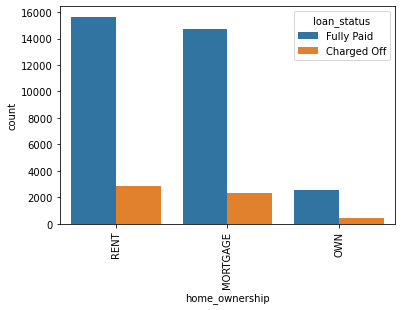

In [39]:
ax = sns.countplot(x="home_ownership", hue="loan_status", data=df, order = df['home_ownership'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

In [40]:
percentage_of_defaulters_who_own_home = df_co['home_ownership'].value_counts()['OWN'] / df_co.shape[0] * 100
percentage_of_defaulters_who_own_home

7.898021037618114

In [41]:
percentage_of_defaulters_who_rent_home = df_co['home_ownership'].value_counts()['RENT'] / df_co.shape[0] * 100
percentage_of_defaulters_who_rent_home

50.61508290247816

In [42]:
for ho in df["home_ownership"].unique():
    percentage_of_defaulters = df_co['home_ownership'].value_counts()[ho]  / df['home_ownership'].value_counts()[ho]  * 100
    print(ho)
    print(percentage_of_defaulters)
    print('---------------------------')

RENT
15.362554112554113
---------------------------
OWN
14.890756302521007
---------------------------
MORTGAGE
13.67134715939134
---------------------------


In [43]:
# Observation for home ownership:

# Even though, the Renters constitute the majority of the defaulters (over 50%), 
# there isn't much difference in the percentage of defaulters among borrowers who rent, own or have a mortgage

# Conclusion for home ownership:
# Home ownership parameter does NOT have an effect of the number of defaulters

In [44]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

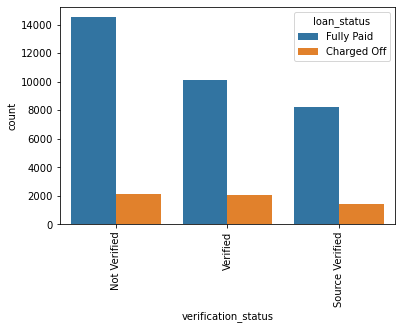

In [45]:
ax = sns.countplot(x="verification_status", hue="loan_status", data=df, order = df['verification_status'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

In [46]:
for vs in df["verification_status"].unique():
    percentage_of_defaulters = df_co['verification_status'].value_counts()[vs]  / df['verification_status'].value_counts()[vs]  * 100
    print(vs)
    print(percentage_of_defaulters)
    print('---------------------------')

Verified
16.795398520953164
---------------------------
Source Verified
14.82362677149064
---------------------------
Not Verified
12.81327002824689
---------------------------


In [47]:
# Conclusion about Verification Status:

# As seen in the above plot, 'Not verified' customers have a lower percentage of defaulting
# than the 'Verified' and 'Source Verified' customers.
# This parameter should be IGNORED.

## dti

<AxesSubplot:xlabel='loan_status'>

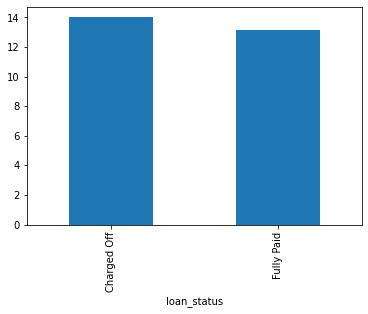

In [48]:
df.groupby('loan_status')['dti'].mean().plot(kind='bar')

In [49]:
# Conclusion for Debt to Income Ratio

# As seen from the above plot, defaulted customers have a higher debt-to-income ratio than those who fully paid off.
# This is an IMPORTANT parameter to be considered during a loan application.

## Employment Length

In [50]:
df['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0])

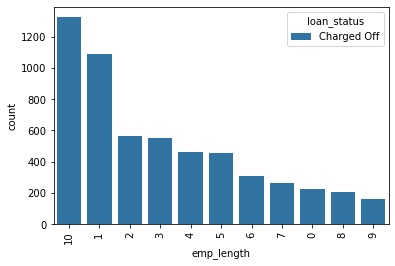

In [51]:
ax = sns.countplot(x="emp_length", hue="loan_status", data=df_co, order = df_co['emp_length'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

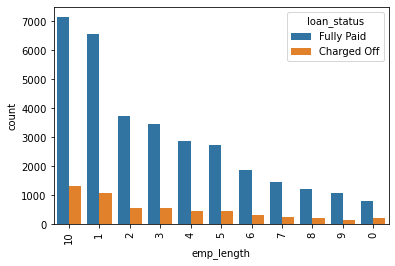

In [60]:
ax = sns.countplot(x="emp_length", hue="loan_status", data=df, order = df['emp_length'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

In [61]:
for el in df["emp_length"].unique():
    percentage_of_defaulters = df_co['emp_length'].value_counts()[el]  / df['emp_length'].value_counts()[el]  * 100
    print(el)
    print(percentage_of_defaulters)
    print('---------------------------')

10
15.657102373361672
---------------------------
1
14.255792643016102
---------------------------
3
13.793103448275861
---------------------------
8
14.185883997204751
---------------------------
9
12.887438825448614
---------------------------
4
13.853073463268368
---------------------------
5
14.335006273525721
---------------------------
6
14.186691312384472
---------------------------
2
13.197850969399674
---------------------------
7
15.339578454332553
---------------------------
0
22.07163601161665
---------------------------


In [53]:
# Conclusion for emp_length:
# While the default rates for customers with employment history are comparable
# Customers with no Employment history have a much higher rate of defaulting at 22%

## Issue Month

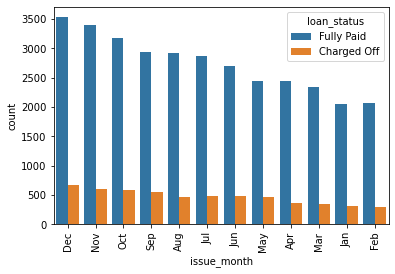

In [54]:
ax = sns.countplot(x="issue_month", hue="loan_status", data=df, order = df['issue_month'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

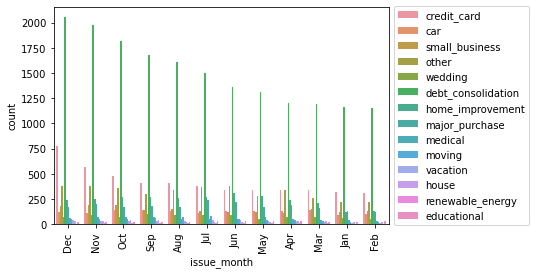

In [55]:
ax = sns.countplot(x="issue_month", hue="purpose", data=df, order = df['issue_month'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [57]:
for im in df["issue_month"].unique():
    percentage_of_defaulters = df_co['issue_month'].value_counts()[im]  / df['issue_month'].value_counts()[im]  * 100
    print(im)
    print(percentage_of_defaulters)
    print('---------------------------')

Dec
16.10833927298646
---------------------------
Nov
14.95
---------------------------
Oct
15.450186467767715
---------------------------
Sep
15.59633027522936
---------------------------
Aug
13.812481514344869
---------------------------
Jul
14.264309259814203
---------------------------
Jun
15.18588531821046
---------------------------
May
15.97389213328753
---------------------------
Apr
13.05427456544874
---------------------------
Mar
12.896011926947448
---------------------------
Feb
12.25531914893617
---------------------------
Jan
13.375527426160339
---------------------------


In [58]:
# Observation about the month of issue
# December sees the highest number of loans issued, most for the purposes of debt consolidation, credit card being 
# the second most popular purpose of the loans. It also shows a slightly higher percentage (16.1%) of defaulters.


# Recommendations:
### Based on the analysis, we make following recommendations:
#### Grades/Sub-grades : Loans applications with grades G & F should be scrutinized more carefully.
#### Employment Length: Loans to customers with no employment history should be given considering their future prospects to repay.
#### Purpose: Background and financials of Small Businesses should be verified more stringently before approval
#### Debt-to-income ratio: A threshold should be established for debt-to-income ratio, above which loans should not be granted.
